<a href="https://colab.research.google.com/github/cristianoAntonio/Message-Board-PGP/blob/main/T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estudante/Matrícula**: 2111100009 2111100026

**Estudante/Matrícula**: Pedro * (Spegiorin + Piaia)

# Trabalho T1 - Arquitetura Básica de Redes Neurais

Este trabalho tem como objetivo a compreensão da arquitetura básica de camadas de neurônios de uma rede neural artificial (RNA). A execução deste exercício permitirá aos estudantes o domínio dos métodos necessários para o treinamento e teste de uma RNA utilizando um dataset pré-processado.

## 1. Instruções


O estudante deve treinar uma RNA com camadas densas e estilo feedforward para uma tarefa de classificação utilizando dataset pré-processado conforme especificado a baixo.

Para cada tentativa de construção de arquitetura, mantenha um registro da tentativa e resultado obtido pela rede. Indique qual a lógica utilizada para criação da arquitetura e qual a percepção do resultado em comparação com tentativas anteriores.

Para este trabalho, somente serão permitidas somente as seguintes bibliotecas `python` para o treinamento da RNA:

- `numpy`
- `scipy`
- `tensorflow`
- `scikit-learn`

Para visualização e criação de gráficos, também serão permitidas

- `matplotlib`
- `seaborn`
- `plotly`
- `yellowbrick`

Caso a utilização de quaisquer outras bibliotecas se faça necessária, uma consulta prévia deve ser feita ao professor.


## Entrega

O presente trabalho pode ser feito individualmente ou em dupla. Caso optem pelo trabalho em dupla, o cabeçalho do documento deve indicar quais são os componentes e suas matrículas.

A entrega deverá ser feita através do envio de um arquivo `ZIP` contendo o trabalho dos estudantes, no SIGAA. A data limite para entrega deste trabalho é **24/09/2023, 23h59m**.

1# tentativa

Nós tentamos aumentar a profundidade da rede para ver o que que acontecia, e teve um aumento da negligenciavel na acurácia mas é provavelmente overkill e a rede com certeza está em overfitting.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(42)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
# https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
tf.random.set_seed(42)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
plt.figure(figsize=(15,15))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
class_names = ['Non-Top', 'Top']
num_classes = 2

train_labels = np.where(((train_labels == 1) |  (train_labels == 5) | (train_labels == 7) | (train_labels == 8) | (train_labels == 9)), 0, 1)
test_labels = np.where(((test_labels == 1) |  (test_labels == 5) | (test_labels == 7) | (test_labels == 8) | (test_labels == 9)), 0, 1)

In [ ]:
plt.figure(figsize=(15,15))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
x_train = train_images.reshape(60000, 784)  ## reorganizando o dataset de treino em 60000 exemplos com 784 features cada
x_test = test_images.reshape(10000, 784)  ## reorganizando o dataset de teste em 60000 exemplos com 784 features cada
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(f'{x_train.shape[0]} exemplos de treino')
print(f'{x_test.shape[0]} exemplos de teste')

y_train = tf.keras.utils.to_categorical(train_labels, num_classes) ## transformando os targets do dataset de treino em classes
y_test = tf.keras.utils.to_categorical(test_labels, num_classes)  ## transformando os targets do dataset de teste em classes

In [ ]:
model = tf.keras.models.Sequential()

# abaixo definimos uma camada de 30 neurônios, com ativação sigmoid e input shape igual a 784 features
model.add(tf.keras.layers.Dense(30, activation='relu', input_shape=(784,)))

model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))

# abaixo definidos a camada de saída com um neurônio por target e ativação softmax
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.summary()

In [ ]:
#compilar e otimizar
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,),
              metrics=['accuracy'])

Quando o Batch é grande o tempo diminui so que afeta a accuracy do gradiente.

As epochs sao auto explicativas quanto maior a quantidade de epochs mais teste sao feitos e a accuracy *tende* a melhorar

In [ ]:
#treino


history = model.fit(x_train, y_train,
                    batch_size=20,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]:.6f}')
print(f'Test accuracy: {score[1] * 100:.4f}%')

In [ ]:
import seaborn as sns
sns.set()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# acurácia
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Acurácia')
ax1.set(xlabel='epoch', ylabel='accuracy')
ax1.legend(['train', 'test'], loc='upper left')

# loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Loss')
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()

print(f'Acurácia: {accuracy_score(np.argmax(y_test, axis=1), y_pred) * 100:.4f}%')

print('\n\nDemais métricas (separadas por classe): ')
print(classification_report(np.argmax(y_test, axis=1), y_pred))

2# Tentativa

Nós voltamos pra um menor número de layers e colocamos o tamanho no batch bem alto. O que resultou em um tempo pra treinar bem menor e incrivelmente e a acurácia e a outras métricas ainda ficaram acima de 90%.

60000 exemplos de treino
10000 exemplos de teste
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 30)                23550     
                                                                 
 dense_26 (Dense)            (None, 30)                930       
                                                                 
 dense_27 (Dense)            (None, 30)                930       
                                                                 
 dense_28 (Dense)            (None, 2)                 62        
                                                                 
Total params: 25472 (99.50 KB)
Trainable params: 25472 (99.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
30/30 [==============================] - 1s 14ms/step - loss: 0.6274 - accuracy: 0.7811 - v

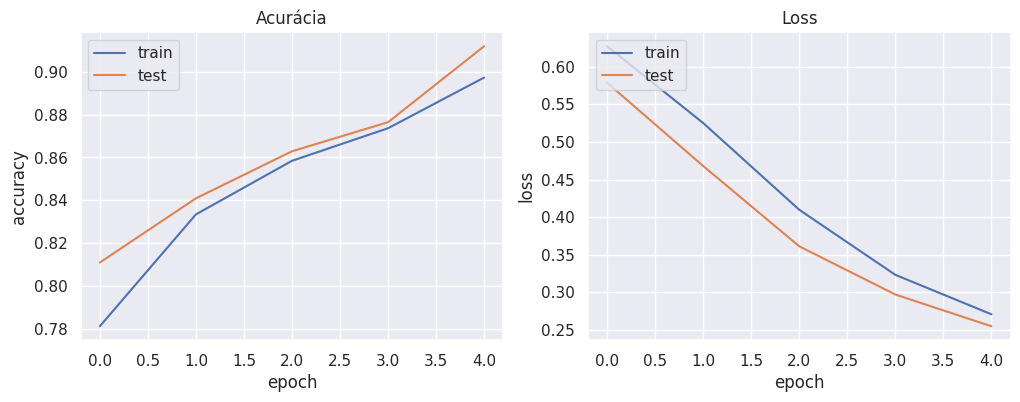

313/313 [==============================] - 1s 2ms/step
Acurácia: 91.2000%


Demais métricas (separadas por classe): 
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      5000
           1       0.86      0.98      0.92      5000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



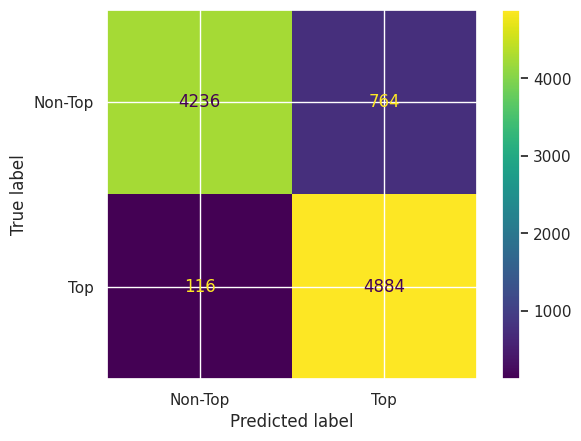

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(42)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
# https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
tf.random.set_seed(42)

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


class_names = ['Non-Top', 'Top']
num_classes = 2

train_labels = np.where(((train_labels == 1) |  (train_labels == 5) | (train_labels == 7) | (train_labels == 8) | (train_labels == 9)), 0, 1)
test_labels = np.where(((test_labels == 1) |  (test_labels == 5) | (test_labels == 7) | (test_labels == 8) | (test_labels == 9)), 0, 1)

x_train = train_images.reshape(60000, 784)  ## reorganizando o dataset de treino em 60000 exemplos com 784 features cada
x_test = test_images.reshape(10000, 784)  ## reorganizando o dataset de teste em 60000 exemplos com 784 features cada
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(f'{x_train.shape[0]} exemplos de treino')
print(f'{x_test.shape[0]} exemplos de teste')

y_train = tf.keras.utils.to_categorical(train_labels, num_classes) ## transformando os targets do dataset de treino em classes
y_test = tf.keras.utils.to_categorical(test_labels, num_classes)  ## transformando os targets do dataset de teste em classes
model = tf.keras.models.Sequential()

# abaixo definimos uma camada de 30 neurônios, com ativação sigmoid e input shape igual a 784 features
model.add(tf.keras.layers.Dense(30, activation='relu', input_shape=(784,)))

model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))

# abaixo definidos a camada de saída com um neurônio por target e ativação softmax
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=2000,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]:.6f}')
print(f'Test accuracy: {score[1] * 100:.4f}%')

import seaborn as sns
sns.set()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# acurácia
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Acurácia')
ax1.set(xlabel='epoch', ylabel='accuracy')
ax1.legend(['train', 'test'], loc='upper left')

# loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Loss')
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()

print(f'Acurácia: {accuracy_score(np.argmax(y_test, axis=1), y_pred) * 100:.4f}%')

print('\n\nDemais métricas (separadas por classe): ')
print(classification_report(np.argmax(y_test, axis=1), y_pred))


3# Tentativa

Aumentamos o número de epochs, e a acurácia ficou muito melhor que os outros testes, mas com mais tempo de treino a probabilidade de entrar em overfitting aumenta, e com esse resultado tão bom é basicamente dado.

60000 exemplos de treino
10000 exemplos de teste
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 30)                23550     
                                                                 
 dense_30 (Dense)            (None, 30)                930       
                                                                 
 dense_31 (Dense)            (None, 30)                930       
                                                                 
 dense_32 (Dense)            (None, 2)                 62        
                                                                 
Total params: 25472 (99.50 KB)
Trainable params: 25472 (99.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
3000/3000 [==============================] - 12s 4ms/step - loss: 0.1019 - accuracy: 0.969

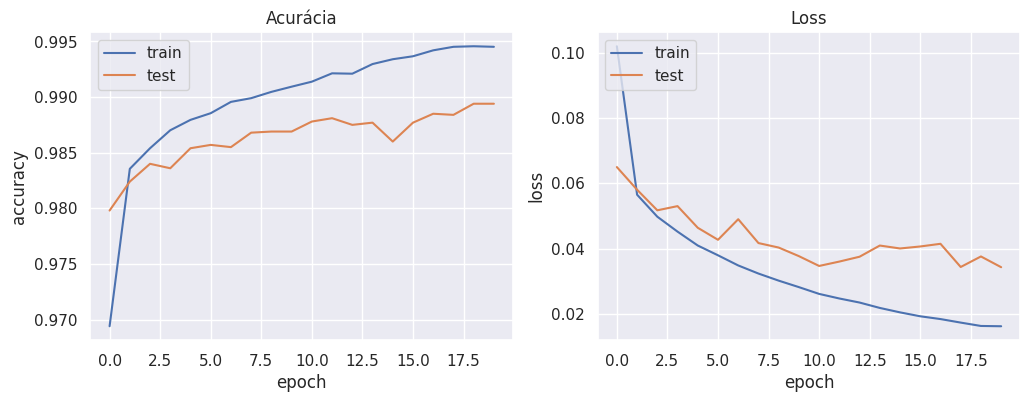

313/313 [==============================] - 1s 2ms/step
Acurácia: 98.9400%


Demais métricas (separadas por classe): 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5000
           1       0.99      0.99      0.99      5000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



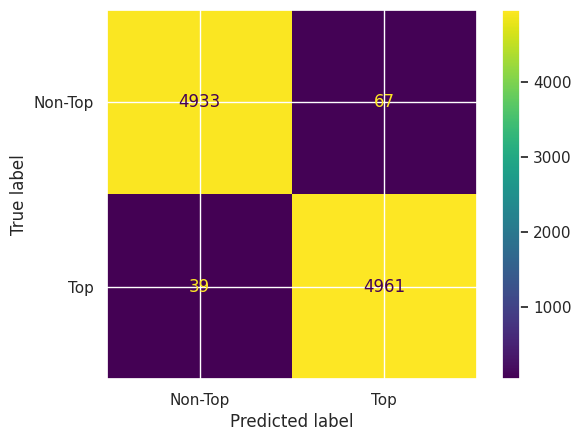

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(42)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
# https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
tf.random.set_seed(42)

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


class_names = ['Non-Top', 'Top']
num_classes = 2

train_labels = np.where(((train_labels == 1) |  (train_labels == 5) | (train_labels == 7) | (train_labels == 8) | (train_labels == 9)), 0, 1)
test_labels = np.where(((test_labels == 1) |  (test_labels == 5) | (test_labels == 7) | (test_labels == 8) | (test_labels == 9)), 0, 1)

x_train = train_images.reshape(60000, 784)  ## reorganizando o dataset de treino em 60000 exemplos com 784 features cada
x_test = test_images.reshape(10000, 784)  ## reorganizando o dataset de teste em 60000 exemplos com 784 features cada
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(f'{x_train.shape[0]} exemplos de treino')
print(f'{x_test.shape[0]} exemplos de teste')

y_train = tf.keras.utils.to_categorical(train_labels, num_classes) ## transformando os targets do dataset de treino em classes
y_test = tf.keras.utils.to_categorical(test_labels, num_classes)  ## transformando os targets do dataset de teste em classes
model = tf.keras.models.Sequential()

# abaixo definimos uma camada de 30 neurônios, com ativação sigmoid e input shape igual a 784 features
model.add(tf.keras.layers.Dense(30, activation='relu', input_shape=(784,)))

model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))

# abaixo definidos a camada de saída com um neurônio por target e ativação softmax
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=20,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]:.6f}')
print(f'Test accuracy: {score[1] * 100:.4f}%')

import seaborn as sns
sns.set()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# acurácia
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Acurácia')
ax1.set(xlabel='epoch', ylabel='accuracy')
ax1.legend(['train', 'test'], loc='upper left')

# loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Loss')
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()

print(f'Acurácia: {accuracy_score(np.argmax(y_test, axis=1), y_pred) * 100:.4f}%')

print('\n\nDemais métricas (separadas por classe): ')
print(classification_report(np.argmax(y_test, axis=1), y_pred))


4# Tentativa

Dessa vez nos diminuimos o growth rate, o que diminuiu consideravel a velocidade que a NN cresceu, dependendo do dataset isso pode ajudar na hora do treinamento ou pode gerar overfitting. Pelo resultado, parece que funcionou bem. Com um baixo numero de falso positivo em especial.


60000 exemplos de treino
10000 exemplos de teste
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 30)                23550     
                                                                 
 dense_34 (Dense)            (None, 30)                930       
                                                                 
 dense_35 (Dense)            (None, 30)                930       
                                                                 
 dense_36 (Dense)            (None, 2)                 62        
                                                                 
Total params: 25472 (99.50 KB)
Trainable params: 25472 (99.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
3000/3000 [==============================] - 12s 4ms/step - loss: 0.6253 - accuracy: 0.7857

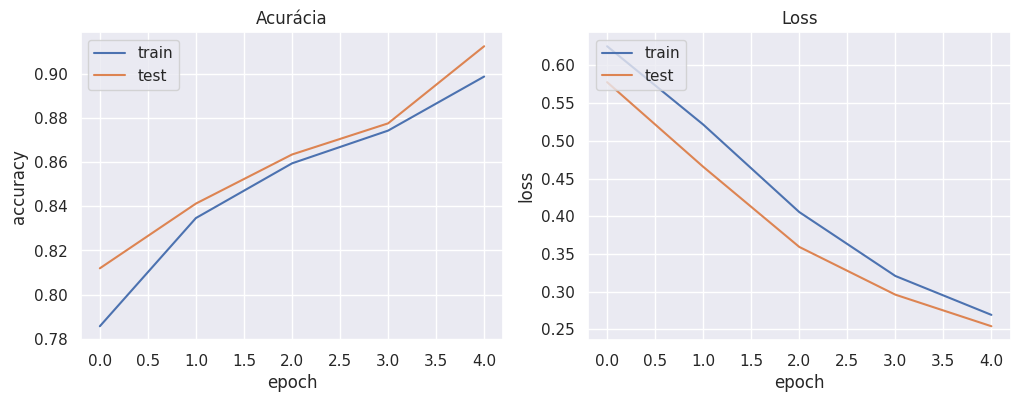

313/313 [==============================] - 1s 2ms/step
Acurácia: 91.2400%


Demais métricas (separadas por classe): 
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      5000
           1       0.87      0.98      0.92      5000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



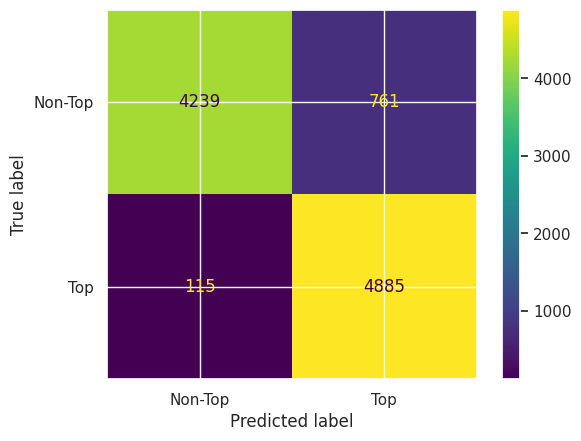

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(42)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
# https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
tf.random.set_seed(42)

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


class_names = ['Non-Top', 'Top']
num_classes = 2

train_labels = np.where(((train_labels == 1) |  (train_labels == 5) | (train_labels == 7) | (train_labels == 8) | (train_labels == 9)), 0, 1)
test_labels = np.where(((test_labels == 1) |  (test_labels == 5) | (test_labels == 7) | (test_labels == 8) | (test_labels == 9)), 0, 1)

x_train = train_images.reshape(60000, 784)  ## reorganizando o dataset de treino em 60000 exemplos com 784 features cada
x_test = test_images.reshape(10000, 784)  ## reorganizando o dataset de teste em 60000 exemplos com 784 features cada
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(f'{x_train.shape[0]} exemplos de treino')
print(f'{x_test.shape[0]} exemplos de teste')

y_train = tf.keras.utils.to_categorical(train_labels, num_classes) ## transformando os targets do dataset de treino em classes
y_test = tf.keras.utils.to_categorical(test_labels, num_classes)  ## transformando os targets do dataset de teste em classes
model = tf.keras.models.Sequential()

# abaixo definimos uma camada de 30 neurônios, com ativação sigmoid e input shape igual a 784 features
model.add(tf.keras.layers.Dense(30, activation='relu', input_shape=(784,)))

model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))

# abaixo definidos a camada de saída com um neurônio por target e ativação softmax
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001,),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=20,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]:.6f}')
print(f'Test accuracy: {score[1] * 100:.4f}%')

import seaborn as sns
sns.set()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# acurácia
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Acurácia')
ax1.set(xlabel='epoch', ylabel='accuracy')
ax1.legend(['train', 'test'], loc='upper left')

# loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Loss')
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()

print(f'Acurácia: {accuracy_score(np.argmax(y_test, axis=1), y_pred) * 100:.4f}%')

print('\n\nDemais métricas (separadas por classe): ')
print(classification_report(np.argmax(y_test, axis=1), y_pred))

#5# Tentativa

Agora aumentamos o numero de nêuronios por camada consideravelmente. Isso fez com que tenhamos uma boa acurácia, porém não só corremos o risco de causar overfitting, mas (por motivos claros) causa com que a rede tome mais tempo treinando.

4422102/4422102 [==============================] - 1s 0us/step
60000 exemplos de treino
10000 exemplos de teste
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 2)                 202       
                                                                 
Total params: 98902 (386.34 KB)
Trainable params: 98902 (386.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
3000/3000 [=================

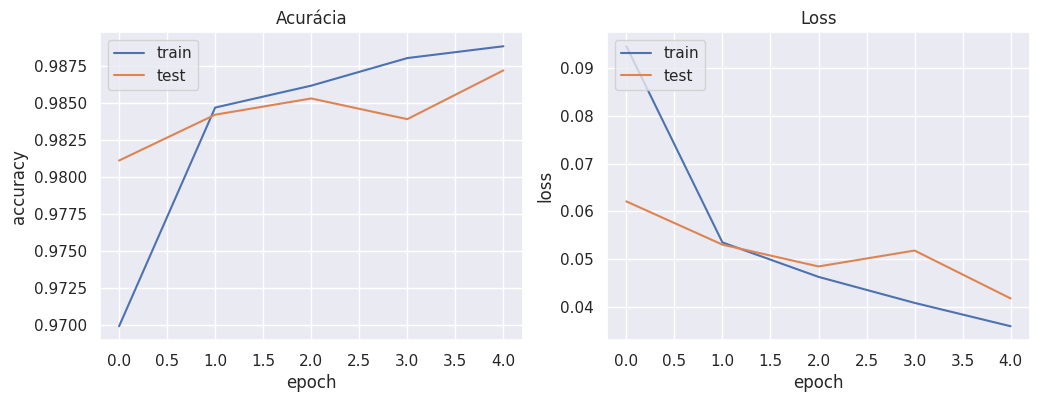

313/313 [==============================] - 1s 2ms/step
Acurácia: 98.7200%


Demais métricas (separadas por classe): 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5000
           1       0.99      0.99      0.99      5000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



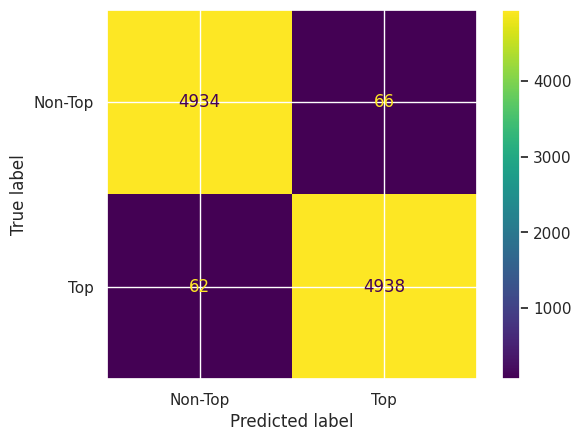

In [ ]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(42)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
# https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
tf.random.set_seed(42)

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


class_names = ['Non-Top', 'Top']
num_classes = 2

train_labels = np.where(((train_labels == 1) |  (train_labels == 5) | (train_labels == 7) | (train_labels == 8) | (train_labels == 9)), 0, 1)
test_labels = np.where(((test_labels == 1) |  (test_labels == 5) | (test_labels == 7) | (test_labels == 8) | (test_labels == 9)), 0, 1)

x_train = train_images.reshape(60000, 784)  ## reorganizando o dataset de treino em 60000 exemplos com 784 features cada
x_test = test_images.reshape(10000, 784)  ## reorganizando o dataset de teste em 60000 exemplos com 784 features cada
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(f'{x_train.shape[0]} exemplos de treino')
print(f'{x_test.shape[0]} exemplos de teste')

y_train = tf.keras.utils.to_categorical(train_labels, num_classes) ## transformando os targets do dataset de treino em classes
y_test = tf.keras.utils.to_categorical(test_labels, num_classes)  ## transformando os targets do dataset de teste em classes
model = tf.keras.models.Sequential()

# abaixo definimos uma camada de 100 neurônios, com ativação sigmoid e input shape igual a 784 features
model.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(784,)))

model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))

# abaixo definidos a camada de saída com um neurônio por target e ativação softmax
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=20,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]:.6f}')
print(f'Test accuracy: {score[1] * 100:.4f}%')

import seaborn as sns
sns.set()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# acurácia
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Acurácia')
ax1.set(xlabel='epoch', ylabel='accuracy')
ax1.legend(['train', 'test'], loc='upper left')

# loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Loss')
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()

print(f'Acurácia: {accuracy_score(np.argmax(y_test, axis=1), y_pred) * 100:.4f}%')

print('\n\nDemais métricas (separadas por classe): ')
print(classification_report(np.argmax(y_test, axis=1), y_pred))

#6# Tentativa
Em vez disso, agora diminuimos o numero de nêuronios por camada. Isso surpreendentemente continuou nos dando uma boa acuracia, sugerindo que o numero de nodos não precise se muito maior para previnir underfitting. Alem disso, diminuir o numero de nodos deve aumentar a velocidade de treinamento.

60000 exemplos de treino
10000 exemplos de teste
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 3925      
                                                                 
 dense_5 (Dense)             (None, 5)                 30        
                                                                 
 dense_6 (Dense)             (None, 5)                 30        
                                                                 
 dense_7 (Dense)             (None, 2)                 12        
                                                                 
Total params: 3997 (15.61 KB)
Trainable params: 3997 (15.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
3000/3000 [==============================] - 13s 4ms/step - loss: 0.1530 - accuracy: 0.9434 -

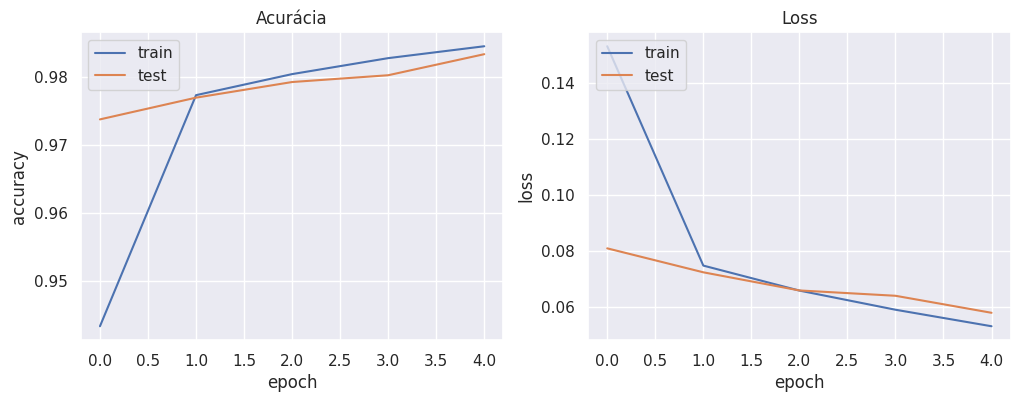

313/313 [==============================] - 1s 2ms/step
Acurácia: 98.3400%


Demais métricas (separadas por classe): 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5000
           1       0.98      0.98      0.98      5000

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



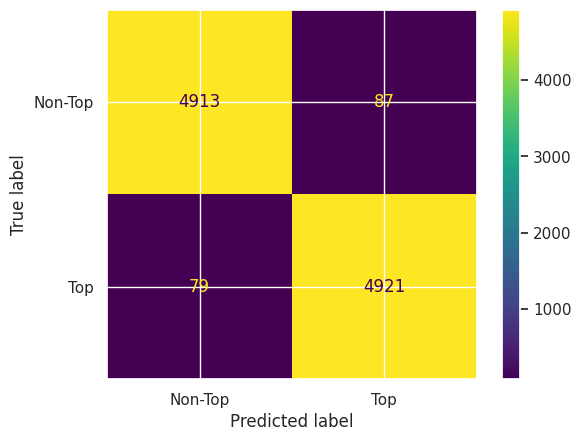

In [ ]:


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(42)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
# https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
tf.random.set_seed(42)

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


class_names = ['Non-Top', 'Top']
num_classes = 2

train_labels = np.where(((train_labels == 1) |  (train_labels == 5) | (train_labels == 7) | (train_labels == 8) | (train_labels == 9)), 0, 1)
test_labels = np.where(((test_labels == 1) |  (test_labels == 5) | (test_labels == 7) | (test_labels == 8) | (test_labels == 9)), 0, 1)

x_train = train_images.reshape(60000, 784)  ## reorganizando o dataset de treino em 60000 exemplos com 784 features cada
x_test = test_images.reshape(10000, 784)  ## reorganizando o dataset de teste em 60000 exemplos com 784 features cada
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(f'{x_train.shape[0]} exemplos de treino')
print(f'{x_test.shape[0]} exemplos de teste')

y_train = tf.keras.utils.to_categorical(train_labels, num_classes) ## transformando os targets do dataset de treino em classes
y_test = tf.keras.utils.to_categorical(test_labels, num_classes)  ## transformando os targets do dataset de teste em classes
model = tf.keras.models.Sequential()

# abaixo definimos uma camada de 5 neurônios, com ativação sigmoid e input shape igual a 784 features
model.add(tf.keras.layers.Dense(5, activation='relu', input_shape=(784,)))

model.add(tf.keras.layers.Dense(5, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='relu'))

# abaixo definidos a camada de saída com um neurônio por target e ativação softmax
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=20,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]:.6f}')
print(f'Test accuracy: {score[1] * 100:.4f}%')

import seaborn as sns
sns.set()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# acurácia
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Acurácia')
ax1.set(xlabel='epoch', ylabel='accuracy')
ax1.legend(['train', 'test'], loc='upper left')

# loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Loss')
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()

print(f'Acurácia: {accuracy_score(np.argmax(y_test, axis=1), y_pred) * 100:.4f}%')

print('\n\nDemais métricas (separadas por classe): ')
print(classification_report(np.argmax(y_test, axis=1), y_pred))